In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data1 = pd.read_csv(r'Walmart DataSet.csv')
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 22


Weekly_Sales    float64
dtype: object

In [5]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,951588.37
01-06-2012,1102857.37
01-07-2011,1077491.68
01-10-2010,905987.17
02-03-2012,974866.65
02-04-2010,1177340.99
02-07-2010,1120259.71
02-09-2011,912762.76
02-12-2011,1167621.14


In [7]:

sales.reset_index(inplace=True)

# converting 'Date' column to a datetime type, specifying dayfirst=True
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

# resetting 'Date' back to the index
sales.set_index('Date', inplace=True)

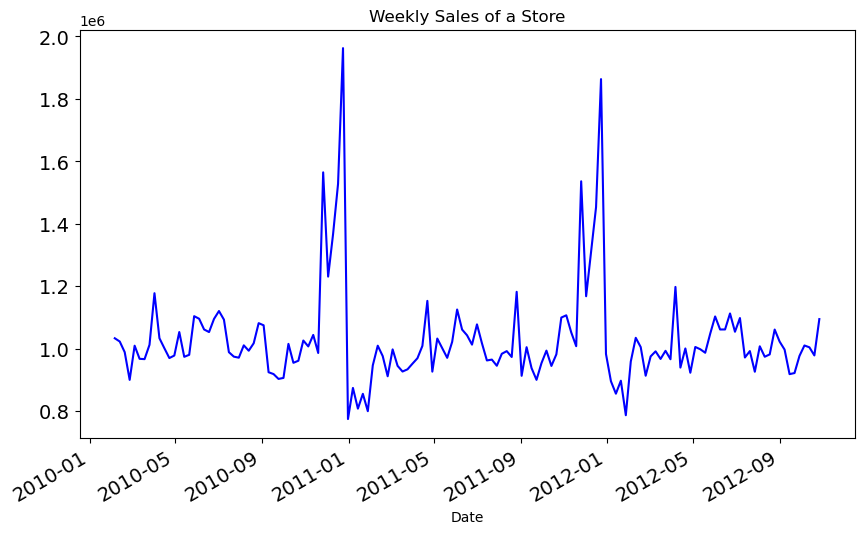

In [8]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

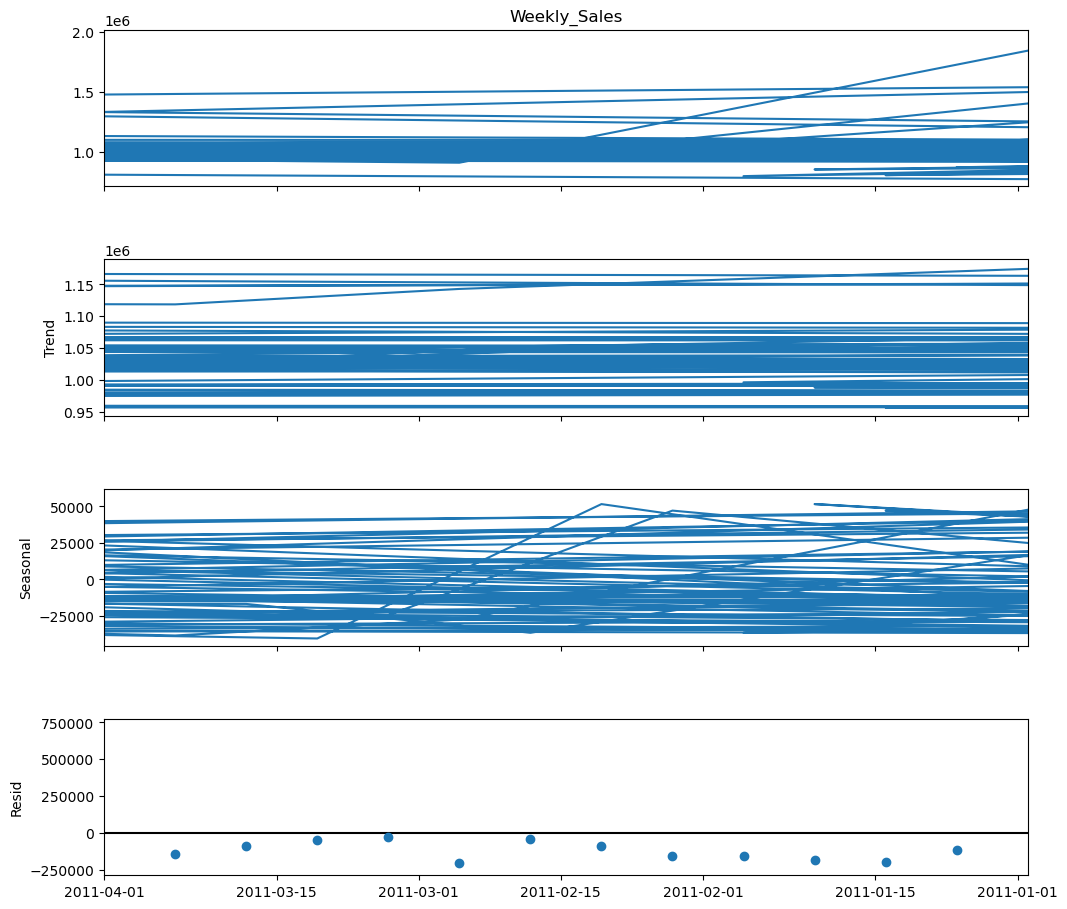

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [11]:
print(sales5.columns)

Index(['Date', 'Weekly_Sales'], dtype='object')


In [12]:
print(sales5['Date'].head())  
# Display the first few entries of the Date column

0    01-04-2011
1    01-06-2012
2    01-07-2011
3    01-10-2010
4    02-03-2012
Name: Date, dtype: object


In [13]:
sales5.reset_index(inplace=True)

# Check the column names
print(sales5.columns)

# Attempting to convert 'Date' column to datetime
sales5['Date'] = pd.to_datetime(sales5['Date'], dayfirst=True, errors='coerce')

# Check for any NaT values
print(sales5['Date'].isna().sum())  # Count how many dates could not be parsed

# Setting 'Date' back as the index
sales5.set_index('Date', inplace=True)

Index(['index', 'Date', 'Weekly_Sales'], dtype='object')
0


In [14]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

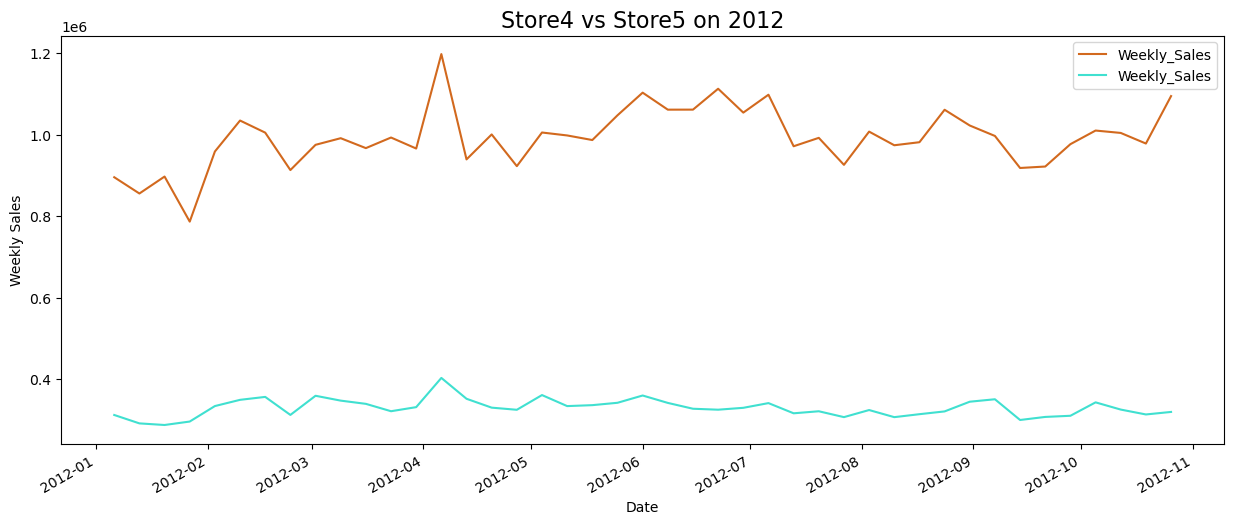

In [15]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()
# Here, we can see so many irregularities 

In [16]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [18]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ADMIN\anaconda3\Lib\site-

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1063      0.269     -4.108      0.000      -1.634      -0.579
ar.L2         -1.0117      0.372     -2.716      0.007      -1.742      -0.282
ar.L3         -0.9680      0.309     -3.128      0.002      -1.574      -0.361
ar.L4         -0.7465      0.187     -3.988      0.000      -1.113      -0.380
ma.L1         -2.2710      0.300     -7.571      0.000      -2.859      -1.683
ma.L2          1.5704      0.607      2.588      0.010       0.381       2.760
ma.L3         -0.2968      0.316     -0.939      0.348      -0.916       0.322
ar.S.L52      -0.5787      0.163     -3.546      0.000      -0.899      -0.259
sigma2      1.142e+11   4.37e-12   2.61e+22      0.000    1.14e+11    1.14e+11


In [20]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [24]:
import seaborn 

In [26]:
pip install seaborn

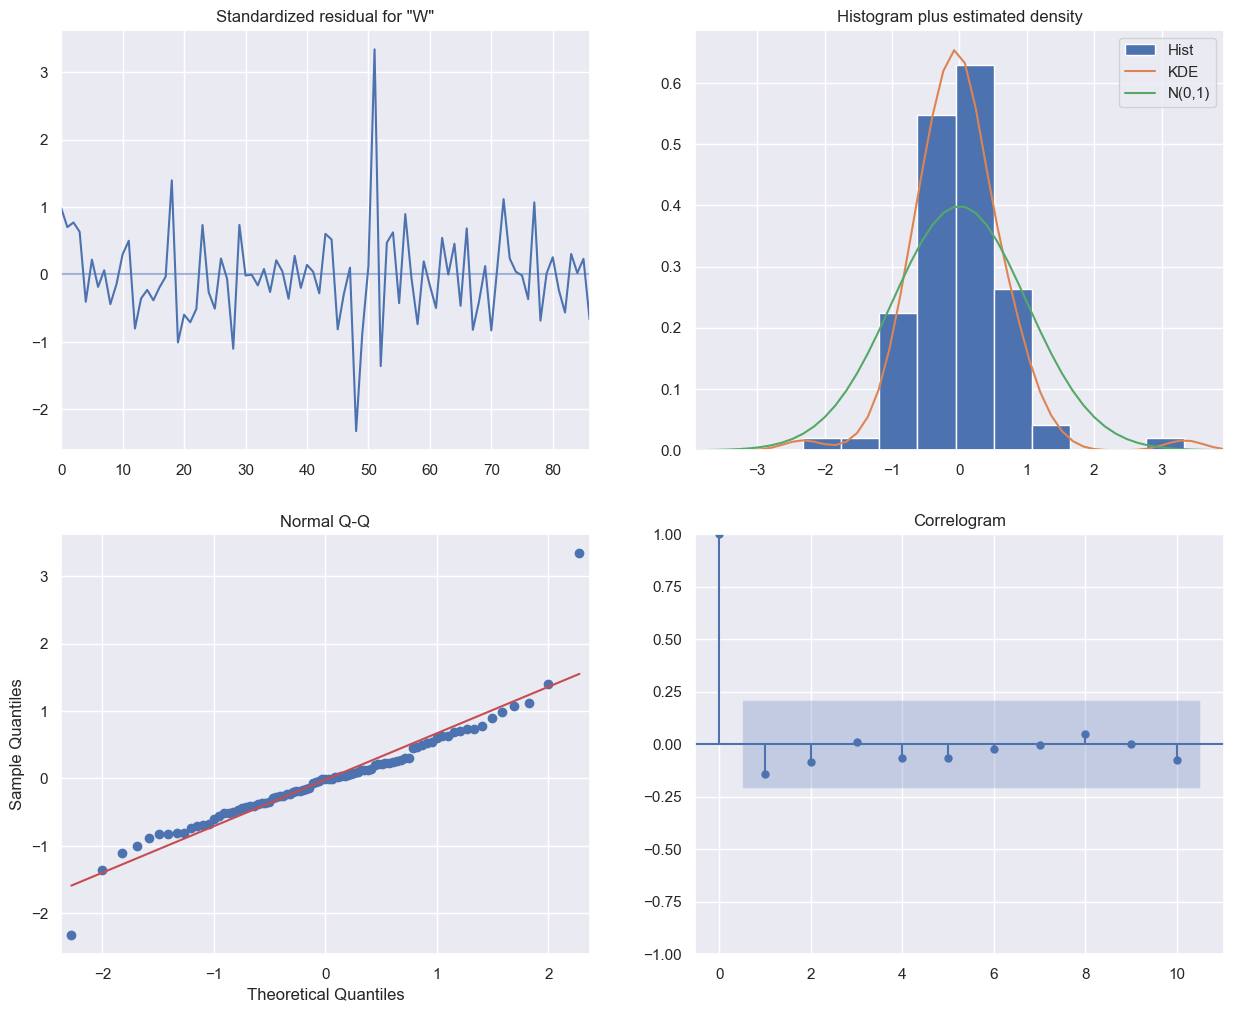

In [27]:
import seaborn as sns
sns.set()  # This will set seaborn's default style
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

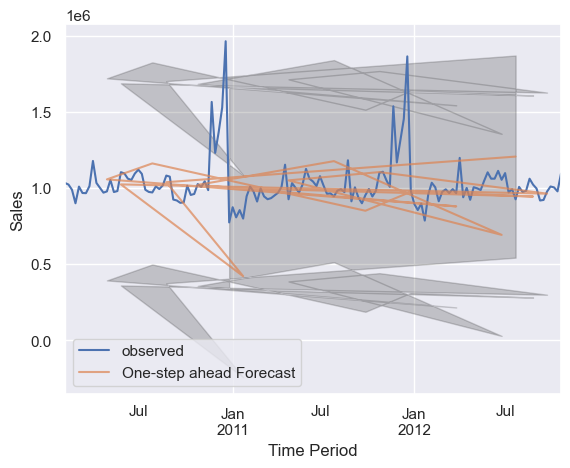

In [30]:
y1 = y1.sort_index()  # Sort the Series by its datetime index

# Plotting
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 28290148323.55


In [32]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


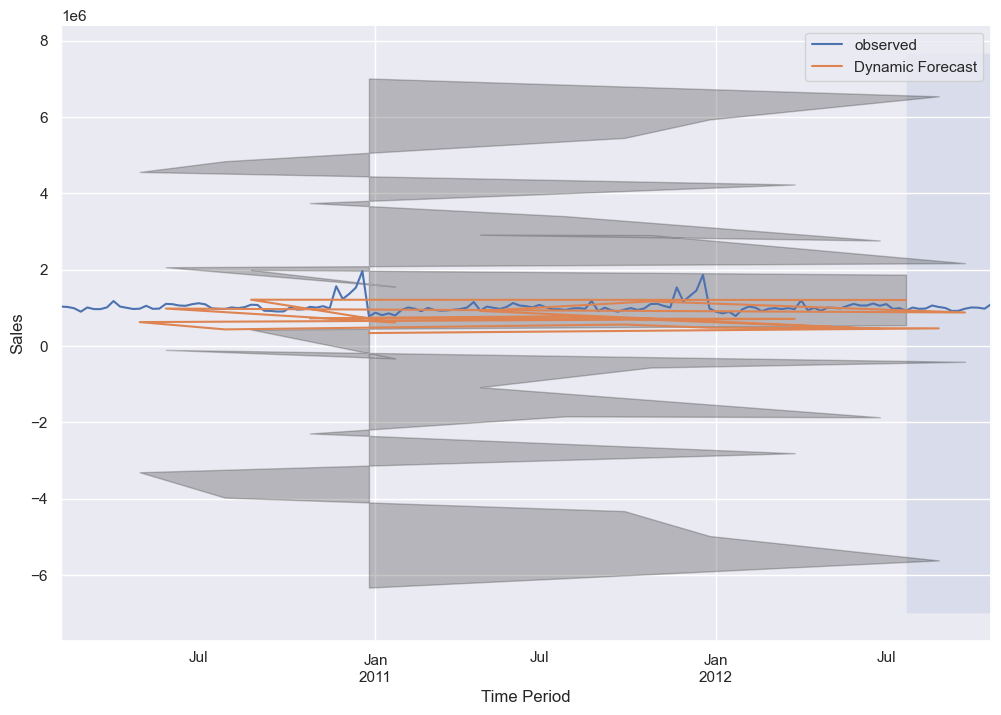

In [33]:

ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [34]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.206025e+06
2010-08-27    1.212923e+06
2011-01-28    6.154388e+05
2010-05-28    9.810740e+05
2012-09-28    8.782477e+05
2011-10-28    1.170045e+06
2011-04-29    9.189295e+05
2012-06-29    4.485779e+05
2011-07-29    7.793084e+05
2010-10-29    7.264067e+05
2012-03-30    7.109935e+05
2010-04-30    6.264206e+05
2010-07-30    4.351807e+05
2011-09-30    5.631123e+05
2011-12-30    4.791397e+05
2012-08-31    4.623029e+05
2010-12-31    3.396874e+05
Name: predicted_mean, dtype: float64


In [35]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-07-27     925731.21
2012-08-03    1007257.83
2012-08-10     973812.79
2012-08-17     981273.26
2012-08-24    1060906.75
2012-08-31    1022270.86
2012-09-07     996628.80
2012-09-14     918049.28
2012-09-21     921612.53
2012-09-28     976479.51
2012-10-05    1009887.36
2012-10-12    1004039.84
2012-10-19     978027.95
2012-10-26    1094422.69
Name: Weekly_Sales, dtype: float64


In [36]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 365959.09


In [37]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 938493.5088895595


In [38]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ADMIN\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [39]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [41]:
print(pred_uc.predicted_mean.index)
print(type(pred_uc.predicted_mean.index))

RangeIndex(start=143, stop=155, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


In [42]:
pred_uc.predicted_mean.index = pd.to_datetime(pred_uc.predicted_mean.index)

TypeError: index type not supported

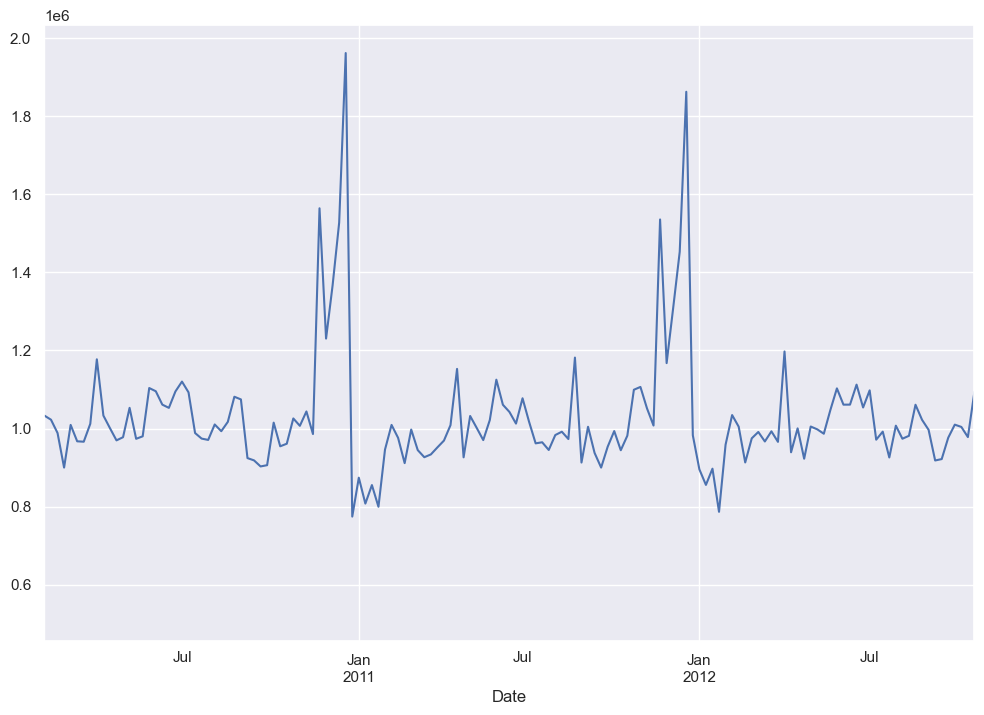

In [43]:
import matplotlib.pyplot as plt

# Assuming y1 is your observed data and is already a time series
ax = y1.plot(label='Observed', figsize=(12, 8))

# Ensure predicted_mean has a proper datetime index
pred_uc.predicted_mean.index = pd.to_datetime(pred_uc.predicted_mean.index)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

# Plot confidence intervals
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

# Set labels
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()